# (1) Load & Inspect Data

## (1.1) Step 1: Libraries

In [331]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
from geopy.geocoders import Nominatim
import contextily as ctx
from ipyleaflet import Map, Marker
from pyproj import Proj, transform
import rasterio
import fiona
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Specify the path to the downloaded file and the destination directory
zip_file_path = r'C:\Users\khaie\Desktop\2022 Russia Ukraine War\2022-ukraine-russian-war.zip'
destination_directory = 'path/to/ukraine_russian_war_data/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

print("Files unzipped successfully")

Files unzipped successfully


## (1.2) Data importation-Collection
Loading the 3 files

In [332]:
# Load the personnel losses data
personnel_data = pd.read_csv(r'C:\Users\khaie\Desktop\2022 Russia Ukraine War\russia_losses_personnel.csv')

# Load the equipment losses data
equipment_data = pd.read_csv(r'C:\Users\khaie\Desktop\2022 Russia Ukraine War\russia_losses_equipment.csv')

# Load the equipment correction data
equipment_correction_data = pd.read_csv(r'C:\Users\khaie\Desktop\2022 Russia Ukraine War\russia_losses_equipment_correction.csv')

# Display the first few records of each DataFrame
print("Personnel Data")
print(personnel_data.head())
print("\nEquipment Data")
print(equipment_data.head())
print("\nEquipment Correction Data")
print(equipment_correction_data.head())

Personnel Data
         date   day  personnel personnel*  POW
0  2025-02-16  1089     858390      about  NaN
1  2025-02-15  1088     856660      about  NaN
2  2025-02-14  1087     855480      about  NaN
3  2025-02-13  1086     854280      about  NaN
4  2025-02-12  1085     853030      about  NaN

Equipment Data
         date   day  aircraft  helicopter   tank    APC  field artillery  \
0  2025-02-16  1089       370         331  10073  21011            23185   
1  2025-02-15  1088       370         331  10068  20927            23174   
2  2025-02-14  1087       370         331  10057  20910            23115   
3  2025-02-13  1086       370         331  10040  20894            23034   
4  2025-02-12  1085       370         331  10023  20871            22976   

    MRL  military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0  1283            NaN        NaN  25377          28                   1067   
1  1283            NaN        NaN  25341          28                   1

## (1.3) List all columns

In [333]:
# List all columns in personnel_data
print("Columns in personnel_data:")
print(personnel_data.columns.tolist())

# List all columns in equipment_data
print("\nColumns in equipment_data:")
print(equipment_data.columns.tolist())

Columns in personnel_data:
['date', 'day', 'personnel', 'personnel*', 'POW']

Columns in equipment_data:
['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship', 'anti-aircraft warfare', 'special equipment', 'mobile SRBM system', 'greatest losses direction', 'vehicles and fuel tanks', 'cruise missiles', 'submarines']


## (?) List all columns- Basic Information

In [334]:
# Display basic information about each dataset
print(personnel_data.info())
print(equipment_data.info())
print(equipment_correction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1088 non-null   object 
 1   day         1088 non-null   int64  
 2   personnel   1088 non-null   int64  
 3   personnel*  1088 non-null   object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 42.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1088 non-null   object 
 1   day                        1088 non-null   int64  
 2   aircraft                   1088 non-null   int64  
 3   helicopter                 1088 non-null   int64  
 4   tank                       1088 non-null   int64  
 5   APC                        1088 non

# (2) Data Cleaning & Preparation

## (2.1) Date Conversion

In [335]:
# Convert the 'date' column to datetime format (handling errors)
personnel_data["date"] = pd.to_datetime(personnel_data["date"], errors="coerce")

# Check for NaT (Not a Time) values, which indicate conversion issues
print(personnel_data[personnel_data["date"].isna()])

Empty DataFrame
Columns: [date, day, personnel, personnel*, POW]
Index: []


## (2.2) Fill Missing Values

In [336]:
equipment_data['vehicles and fuel tanks'].fillna(equipment_data['vehicles and fuel tanks'].median(), inplace=True)
equipment_data['cruise missiles'].fillna(equipment_data['cruise missiles'].median(), inplace=True)
equipment_data['special equipment'].fillna(equipment_data['special equipment'].median(), inplace=True)


C:\Users\khaie\AppData\Local\Temp\ipykernel_40948\1459346031.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\khaie\AppData\Local\Temp\ipykernel_40948\1459346031.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## (2.3) Dropped Personnel* etc

In [337]:
# Drop the specified columns from equipment_data DataFrame if they exist
columns_to_drop = ['submarines', 'mobile SRBM system', 'military auto', 'fuel tank']
columns_to_drop = [col for col in columns_to_drop if col in equipment_data.columns]
equipment_data.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame to verify the changes
print(equipment_data.head())


         date   day  aircraft  helicopter   tank    APC  field artillery  \
0  2025-02-16  1089       370         331  10073  21011            23185   
1  2025-02-15  1088       370         331  10068  20927            23174   
2  2025-02-14  1087       370         331  10057  20910            23115   
3  2025-02-13  1086       370         331  10040  20894            23034   
4  2025-02-12  1085       370         331  10023  20871            22976   

    MRL  drone  naval ship  anti-aircraft warfare  special equipment  \
0  1283  25377          28                   1067             3749.0   
1  1283  25341          28                   1067             3747.0   
2  1282  25224          28                   1066             3745.0   
3  1278  25072          28                   1063             3744.0   
4  1276  24919          28                   1061             3742.0   

  greatest losses direction  vehicles and fuel tanks  cruise missiles  
0                       NaN           

In [338]:
# Check for missing values in each dataset
print(personnel_data.isnull().sum())
print(equipment_data.isnull().sum())
print(equipment_correction_data.isnull().sum())

date             0
day              0
personnel        0
personnel*       0
POW           1026
dtype: int64
date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment              0
greatest losses direction    885
vehicles and fuel tanks        0
cruise missiles                0
dtype: int64
date                       0
day                        0
aircraft                   0
helicopter                 0
tank                       0
APC                        0
field artillery            0
MRL                        0
drone                      0
naval ship                 0
submarines                 0
anti-aircraft warfare      0
special equipment          0
vehicle

# (3) Exploratory Data Analysis (EDA)

## (3.1)Statistic Summary

## (3.2) Display the summary statistics

In [339]:
# Display summary statistics for personnel_data
print("Summary Statistics for Personnel Data:")
print(personnel_data.describe())

# Display summary statistics for equipment_data
print("\nSummary Statistics for Equipment Data:")
print(equipment_data.describe())

Summary Statistics for Personnel Data:
                      date          day      personnel         POW
count                 1088  1088.000000    1088.000000   62.000000
mean   2023-08-22 12:00:00   545.500000  311275.923713  386.387097
min    2022-02-25 00:00:00     2.000000    2800.000000    0.000000
25%    2022-11-23 18:00:00   273.750000   85642.500000  389.000000
50%    2023-08-22 12:00:00   545.500000  258580.000000  421.000000
75%    2024-05-20 06:00:00   817.250000  494035.000000  474.500000
max    2025-02-16 00:00:00  1089.000000  858390.000000  496.000000
std                    NaN   314.222851  245252.298974  131.440363

Summary Statistics for Equipment Data:
               day     aircraft   helicopter          tank           APC  \
count  1088.000000  1088.000000  1088.000000   1088.000000   1088.000000   
mean    545.500000   301.499081   281.008272   5014.780331   9932.453125   
std     314.222851    67.468334    64.671322   2818.251147   5505.397746   
min       2.00

## (3.3) Distribution Plot for Personnel Data

In [340]:
import plotly.express as px

# Calculate daily changes for personnel data
if 'personnel' in personnel_data.columns:
	personnel_data['daily_personnel_change'] = personnel_data['personnel'].diff().fillna(0).abs().astype(int)

# Distribution Plot for Personnel Data
fig = px.histogram(personnel_data, x='daily_personnel_change', nbins=30, title='Distribution of Personnel Data')
fig.update_layout(xaxis_title='Personnel', yaxis_title='Frequency')
fig.show()


## (3.4) Scatter Plot for Personnel Data

In [341]:
# Rename duplicate columns in equipment_data
equipment_data = equipment_data.rename(columns={'drone': 'drone_1', 'submarines': 'submarines_1'})

# Scatter plot for personnel data
fig_scatter = px.scatter(personnel_data, x='date', y='daily_personnel_change', title='Personnel Over Time')
fig_scatter.show()



## (3.5) Scatter Plot for Daily Personnel Losses

In [342]:
# Histogram for personnel data
fig_hist = px.histogram(personnel_data, x='daily_personnel_change', nbins=30, title='Distribution of Personnel')
fig_hist.show()

## (3.5) Box plot for equipment data

In [343]:
# Box plot for equipment data
fig_box = px.box(equipment_data, y=['daily_tank_change', 'daily_APC_change', 'daily_field_artillery_change', 'daily_MRL_change', 'daily_anti_aircraft_warfare_change'], title='Box Plot for Equipment Data')
fig_box.show()

# (4) Feature Engineering & Data Processing

## (4.1) Calculate Daily Changes (Personnel)

In [344]:
# Calculate daily changes for personnel data
if 'personnel' in personnel_data.columns:
	personnel_data['daily_personnel_change'] = personnel_data['personnel'].diff().fillna(0).abs().astype(int)
if 'POW' in personnel_data.columns:
	personnel_data['daily_POW_change'] = personnel_data['POW'].diff().fillna(0).abs().astype(int)

# Display the updated DataFrames
personnel_columns_to_display = ['date', 'daily_personnel_change', 'daily_POW_change']

# Check if columns exist before displaying
personnel_columns_to_display = [col for col in personnel_columns_to_display if col in personnel_data.columns]

print(personnel_data[personnel_columns_to_display].head())

        date  daily_personnel_change  daily_POW_change
0 2025-02-16                       0                 0
1 2025-02-15                    1730                 0
2 2025-02-14                    1180                 0
3 2025-02-13                    1200                 0
4 2025-02-12                    1250                 0


## (4.2) Calculate Daily Changes for Equipment

In [345]:
# Calculate daily changes for equipment data
columns_to_check = [
	'aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank',
	'drone', 'naval ship', 'anti-aircraft warfare', 'special equipment', 'mobile SRBM system',
	'vehicles and fuel tanks', 'cruise missiles', 'submarines'
]
for column in columns_to_check:
	if column in equipment_data.columns:
		equipment_data[f'daily_{column.replace(" ", "_")}_change'] = equipment_data[column].diff().fillna(0).abs().astype(int)

equipment_columns_to_display = ['date', 'aircraft', 'daily_aircraft_change', 'helicopter', 'daily_helicopter_change', 'tank', 'daily_tank_change', 'APC', 'daily_APC_change', 'field artillery', 'daily_field_artillery_change', 'MRL', 'daily_MRL_change', 'military auto', 'daily_military_auto_change', 'fuel tank', 'daily_fuel_tank_change', 'drone', 'daily_drone_change', 'naval ship', 'daily_naval_ship_change', 'anti-aircraft warfare', 'daily_anti_aircraft_warfare_change', 'special equipment', 'daily_special_equipment_change', 'mobile SRBM system', 'daily_mobile_SRBM_system_change', 'vehicles and fuel tanks', 'daily_vehicles_and_fuel_tanks_change', 'cruise missiles', 'daily_cruise_missiles_change', 'submarines', 'daily_submarines_change']
equipment_columns_to_display = [col for col in equipment_columns_to_display if col in equipment_data.columns]
print(equipment_data[equipment_columns_to_display].head())

         date  aircraft  daily_aircraft_change  helicopter  \
0  2025-02-16       370                      0         331   
1  2025-02-15       370                      0         331   
2  2025-02-14       370                      0         331   
3  2025-02-13       370                      0         331   
4  2025-02-12       370                      0         331   

   daily_helicopter_change   tank  daily_tank_change    APC  daily_APC_change  \
0                        0  10073                  0  21011                 0   
1                        0  10068                  5  20927                84   
2                        0  10057                 11  20910                17   
3                        0  10040                 17  20894                16   
4                        0  10023                 17  20871                23   

   field artillery  ...  daily_MRL_change  naval ship  \
0            23185  ...                 0          28   
1            23174  ...   

## (4.3) Group Data by Month (Summing Daily Personnel Changes)

In [346]:
import plotly.express as px

# Ensure the 'date' column is in datetime format
personnel_data['date'] = pd.to_datetime(personnel_data['date'])

# Group the data by month and sum the daily personnel changes
personnel_data['month'] = personnel_data['date'].dt.to_period('M')
monthly_personnel_losses = personnel_data.groupby('month')['daily_personnel_change'].sum().reset_index()

# Convert 'month' to string to avoid JSON serialization error
monthly_personnel_losses['month'] = monthly_personnel_losses['month'].astype(str)

# Create the bar chart
fig_monthly_losses = px.bar(monthly_personnel_losses, x='month', y='daily_personnel_change', title='Monthly Personnel Losses')
fig_monthly_losses.show()

# (5) Final Checks Before Merging

# (1.9)Daily changes for equipment

In [347]:
# Calculate daily changes for the missing columns in equipment data
if 'MRL' in equipment_data.columns:
	equipment_data['daily_MRL_change'] = equipment_data['MRL'].diff().fillna(0).abs().astype(int)
if 'military auto' in equipment_data.columns:
	equipment_data['daily_military_auto_change'] = equipment_data['military auto'].diff().fillna(0).abs().astype(int)
if 'fuel tank' in equipment_data.columns:
	equipment_data['daily_fuel_tank_change'] = equipment_data['fuel tank'].diff().fillna(0).abs().astype(int)
if 'naval ship' in equipment_data.columns:
	equipment_data['daily_naval_ship_change'] = equipment_data['naval ship'].diff().fillna(0).abs().astype(int)
if 'anti-aircraft warfare' in equipment_data.columns:
	equipment_data['daily_anti_aircraft_warfare_change'] = equipment_data['anti-aircraft warfare'].diff().fillna(0).abs().astype(int)

# Display the updated DataFrame to verify the changes
columns_to_display = ['date', 'MRL', 'daily_MRL_change', 'military auto', 'daily_military_auto_change', 'fuel tank', 'daily_fuel_tank_change', 'naval ship', 'daily_naval_ship_change', 'anti-aircraft warfare', 'daily_anti_aircraft_warfare_change']
columns_to_display = [col for col in columns_to_display if col in equipment_data.columns]
print(equipment_data[columns_to_display].head())

         date   MRL  daily_MRL_change  naval ship  daily_naval_ship_change  \
0  2025-02-16  1283                 0          28                        0   
1  2025-02-15  1283                 0          28                        0   
2  2025-02-14  1282                 1          28                        0   
3  2025-02-13  1278                 4          28                        0   
4  2025-02-12  1276                 2          28                        0   

   anti-aircraft warfare  daily_anti_aircraft_warfare_change  
0                   1067                                   0  
1                   1067                                   0  
2                   1066                                   1  
3                   1063                                   3  
4                   1061                                   2  


## (5.3) Daily Changes

In [348]:
# Calculate daily changes for personnel data
if 'personnel' in personnel_data.columns:
	personnel_data['daily_personnel_change'] = personnel_data['personnel'].diff().fillna(0).abs().astype(int)
if 'POW' in personnel_data.columns:
	personnel_data['daily_POW_change'] = personnel_data['POW'].diff().fillna(0).abs().astype(int)

# Calculate daily changes for equipment data
columns_to_check = [
	'aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank',
	'drone', 'naval ship', 'anti-aircraft warfare', 'special equipment', 'mobile SRBM system',
	'vehicles and fuel tanks', 'cruise missiles', 'submarines'
]

for column in columns_to_check:
	if column in equipment_data.columns:
		equipment_data[f'daily_{column.replace(" ", "_")}_change'] = equipment_data[column].diff().fillna(0).abs().astype(int)

# Display the updated DataFrames
personnel_columns_to_display = ['date', 'daily_personnel_change', 'daily_POW_change']
equipment_columns_to_display = ['date', 'aircraft', 'daily_aircraft_change', 'helicopter', 'daily_helicopter_change', 'tank', 'daily_tank_change', 'APC', 'daily_APC_change', 'field artillery', 'daily_field_artillery_change', 'MRL', 'daily_MRL_change', 'military auto', 'daily_military_auto_change', 'fuel tank', 'daily_fuel_tank_change', 'drone', 'daily_drone_change', 'naval ship', 'daily_naval_ship_change', 'anti-aircraft warfare', 'daily_anti_aircraft_warfare_change', 'special equipment', 'daily_special_equipment_change', 'mobile SRBM system', 'daily_mobile_SRBM_system_change', 'vehicles and fuel tanks', 'daily_vehicles_and_fuel_tanks_change', 'cruise missiles', 'daily_cruise_missiles_change', 'submarines', 'daily_submarines_change']

# Check if columns exist before displaying
personnel_columns_to_display = [col for col in personnel_columns_to_display if col in personnel_data.columns]
equipment_columns_to_display = [col for col in equipment_columns_to_display if col in equipment_data.columns]

print(personnel_data[personnel_columns_to_display].head())
print(equipment_data[equipment_columns_to_display].head())


        date  daily_personnel_change  daily_POW_change
0 2025-02-16                       0                 0
1 2025-02-15                    1730                 0
2 2025-02-14                    1180                 0
3 2025-02-13                    1200                 0
4 2025-02-12                    1250                 0
         date  aircraft  daily_aircraft_change  helicopter  \
0  2025-02-16       370                      0         331   
1  2025-02-15       370                      0         331   
2  2025-02-14       370                      0         331   
3  2025-02-13       370                      0         331   
4  2025-02-12       370                      0         331   

   daily_helicopter_change   tank  daily_tank_change    APC  daily_APC_change  \
0                        0  10073                  0  21011                 0   
1                        0  10068                  5  20927                84   
2                        0  10057                 11  

## (5.2) Dropping Columns

In [349]:
# Drop the specified columns from personnel_data if they exist
columns_to_drop_personnel = ['personnel', 'personnel*', 'POW']
columns_to_drop_personnel = [col for col in columns_to_drop_personnel if col in personnel_data.columns]
personnel_data.drop(columns=columns_to_drop_personnel, inplace=True)

# Drop the specified columns from equipment_data if they exist
columns_to_drop_equipment = ['aircraft', 'helicopter', 'tank', 'APC', 'special equipment', 'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles', 'MRL', 'military auto', 'fuel tank', 'naval ship', 'anti-aircraft warfare']
columns_to_drop_equipment = [col for col in columns_to_drop_equipment if col in equipment_data.columns]
equipment_data.drop(columns=columns_to_drop_equipment, inplace=True)

# Display the updated DataFrames to verify the changes
print("Updated Personnel Data:")
print(personnel_data.head())

print("\nUpdated Equipment Data:")
print(equipment_data.head())

Updated Personnel Data:
        date   day  daily_personnel_change  daily_POW_change    month
0 2025-02-16  1089                       0                 0  2025-02
1 2025-02-15  1088                    1730                 0  2025-02
2 2025-02-14  1087                    1180                 0  2025-02
3 2025-02-13  1086                    1200                 0  2025-02
4 2025-02-12  1085                    1250                 0  2025-02

Updated Equipment Data:
         date   day  field artillery  drone_1 greatest losses direction  \
0  2025-02-16  1089            23185    25377                       NaN   
1  2025-02-15  1088            23174    25341                       NaN   
2  2025-02-14  1087            23115    25224                       NaN   
3  2025-02-13  1086            23034    25072                       NaN   
4  2025-02-12  1085            22976    24919                       NaN   

   daily_aircraft_change  daily_helicopter_change  daily_tank_change  \
0       

# (6) Merge columns

## (6.1) Merge the 2 Datasets

In [350]:
# Ensure the 'date' column is of datetime type in both DataFrames
personnel_data['date'] = pd.to_datetime(personnel_data['date'])
equipment_data['date'] = pd.to_datetime(equipment_data['date'])

# Merge personnel and equipment data
merged_data = pd.merge(personnel_data, equipment_data, on='date', how='outer')

# Display the merged DataFrame
print(merged_data.head())

        date  day_x  daily_personnel_change  daily_POW_change    month  day_y  \
0 2022-02-25      2                    1500                 0  2022-02      2   
1 2022-02-26      3                     200                 0  2022-02      3   
2 2022-02-27      4                     800                 0  2022-02      4   
3 2022-02-28      5                     410               200  2022-02      5   
4 2022-03-01      6                     130                 0  2022-03      6   

   field artillery  drone_1 greatest losses direction  daily_aircraft_change  \
0               49        0                       NaN                     17   
1               49        2                       NaN                      0   
2               50        2                       NaN                      2   
3               74        3                       NaN                      0   
4               77        3                       NaN                      1   

   ...  daily_tank_change  daily

## (6.2) Handle Any Missing Values Post-Merge

In [351]:
print(merged_data.isnull().sum())


date                                      0
day_x                                     0
daily_personnel_change                    0
daily_POW_change                          0
month                                     0
day_y                                     0
field artillery                           0
drone_1                                   0
greatest losses direction               885
daily_aircraft_change                     0
daily_helicopter_change                   0
daily_tank_change                         0
daily_APC_change                          0
daily_field_artillery_change              0
daily_MRL_change                          0
daily_naval_ship_change                   0
daily_anti-aircraft_warfare_change        0
daily_special_equipment_change            0
daily_vehicles_and_fuel_tanks_change      0
daily_cruise_missiles_change              0
daily_anti_aircraft_warfare_change        0
dtype: int64


## Fill or drop missing values if necessary

In [352]:
merged_data.fillna(0, inplace=True)  # Example: Fill missing values with 0


## Check for duplicates:

In [353]:
print(merged_data.duplicated().sum())


0


## Ensure date is still in datetime format:

In [354]:
print(merged_data.dtypes)


date                                    datetime64[ns]
day_x                                            int64
daily_personnel_change                           int64
daily_POW_change                                 int64
month                                        period[M]
day_y                                            int64
field artillery                                  int64
drone_1                                          int64
greatest losses direction                       object
daily_aircraft_change                            int64
daily_helicopter_change                          int64
daily_tank_change                                int64
daily_APC_change                                 int64
daily_field_artillery_change                     int64
daily_MRL_change                                 int64
daily_naval_ship_change                          int64
daily_anti-aircraft_warfare_change               int64
daily_special_equipment_change                   int64
daily_vehi

## Confirm that column names are clean and consistent

In [355]:
print(merged_data.columns)


Index(['date', 'day_x', 'daily_personnel_change', 'daily_POW_change', 'month',
       'day_y', 'field artillery', 'drone_1', 'greatest losses direction',
       'daily_aircraft_change', 'daily_helicopter_change', 'daily_tank_change',
       'daily_APC_change', 'daily_field_artillery_change', 'daily_MRL_change',
       'daily_naval_ship_change', 'daily_anti-aircraft_warfare_change',
       'daily_special_equipment_change',
       'daily_vehicles_and_fuel_tanks_change', 'daily_cruise_missiles_change',
       'daily_anti_aircraft_warfare_change'],
      dtype='object')


In [356]:
print(merged_data.columns)

Index(['date', 'day_x', 'daily_personnel_change', 'daily_POW_change', 'month',
       'day_y', 'field artillery', 'drone_1', 'greatest losses direction',
       'daily_aircraft_change', 'daily_helicopter_change', 'daily_tank_change',
       'daily_APC_change', 'daily_field_artillery_change', 'daily_MRL_change',
       'daily_naval_ship_change', 'daily_anti-aircraft_warfare_change',
       'daily_special_equipment_change',
       'daily_vehicles_and_fuel_tanks_change', 'daily_cruise_missiles_change',
       'daily_anti_aircraft_warfare_change'],
      dtype='object')


## Standardize Column Names

In [357]:
merged_data.rename(columns={
    'greatest losses direction': 'greatest_losses_direction',
    'daily_anti_aircraft_warfare_change': 'daily_anti_aircraft_change',
    'anti-aircraft_warfare_change': 'daily_anti_aircraft_change'
}, inplace=True)


In [358]:
merged_data.columns = merged_data.columns.str.replace('daily_', '', regex=True).str.replace('_change', '', regex=True)


In [359]:
print(merged_data.columns)
# ['date', 'day_x', 'personnel', 'POW', 'month', 'day_y', 
#  'field_artillery', 'drone_1', 'greatest_losses_direction', 
#  'aircraft', 'helicopter', 'tank', 'APC', 'field_artillery', 
#  'MRL', 'naval_ship', 'anti_aircraft_warfare', 'special_equipment', 
#  'vehicles_and_fuel_tanks', 'cruise_missiles']


Index(['date', 'day_x', 'personnel', 'POW', 'month', 'day_y',
       'field artillery', 'drone_1', 'greatest_losses_direction', 'aircraft',
       'helicopter', 'tank', 'APC', 'field_artillery', 'MRL', 'naval_ship',
       'anti-aircraft_warfare', 'special_equipment', 'vehicles_and_fuel_tanks',
       'cruise_missiles', 'anti_aircraft'],
      dtype='object')


In [360]:
# Standardize column names (replace spaces with underscores)
merged_data.columns = merged_data.columns.str.replace(' ', '_')

# Check for duplicates
print(merged_data.columns)  # Verify if 'field_artillery' appears twice

# If duplicates exist, drop one or rename
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]


Index(['date', 'day_x', 'personnel', 'POW', 'month', 'day_y',
       'field_artillery', 'drone_1', 'greatest_losses_direction', 'aircraft',
       'helicopter', 'tank', 'APC', 'field_artillery', 'MRL', 'naval_ship',
       'anti-aircraft_warfare', 'special_equipment', 'vehicles_and_fuel_tanks',
       'cruise_missiles', 'anti_aircraft'],
      dtype='object')


In [361]:
import pandas as pd

# Rename columns
merged_data.rename(columns={
    'greatest losses direction': 'greatest_losses_direction',
    'daily_anti-aircraft_warfare_change': 'daily_anti_aircraft_change',
    'anti-aircraft_warfare': 'daily_anti_aircraft'
}, inplace=True)

# Create an Index object and print it
index = pd.Index(['date', 'day', 'personnel', 'POW', 'month', 'field_artillery',
                  'drone_1', 'greatest_losses_direction', 'aircraft', 'helicopter',
                  'tank', 'APC', 'MRL', 'naval_ship', 'anti_aircraft_warfare',
                  'special_equipment', 'vehicles_and_fuel_tanks', 'cruise_missiles'], dtype='object')

print(index)


Index(['date', 'day', 'personnel', 'POW', 'month', 'field_artillery',
       'drone_1', 'greatest_losses_direction', 'aircraft', 'helicopter',
       'tank', 'APC', 'MRL', 'naval_ship', 'anti_aircraft_warfare',
       'special_equipment', 'vehicles_and_fuel_tanks', 'cruise_missiles'],
      dtype='object')


## Confirm that column names are clean and consistent:

In [362]:
print(merged_data.columns)


Index(['date', 'day_x', 'personnel', 'POW', 'month', 'day_y',
       'field_artillery', 'drone_1', 'greatest_losses_direction', 'aircraft',
       'helicopter', 'tank', 'APC', 'MRL', 'naval_ship', 'daily_anti_aircraft',
       'special_equipment', 'vehicles_and_fuel_tanks', 'cruise_missiles',
       'anti_aircraft'],
      dtype='object')


# (1.11) Data Visualization

# Distribution Plot for Personnel Data

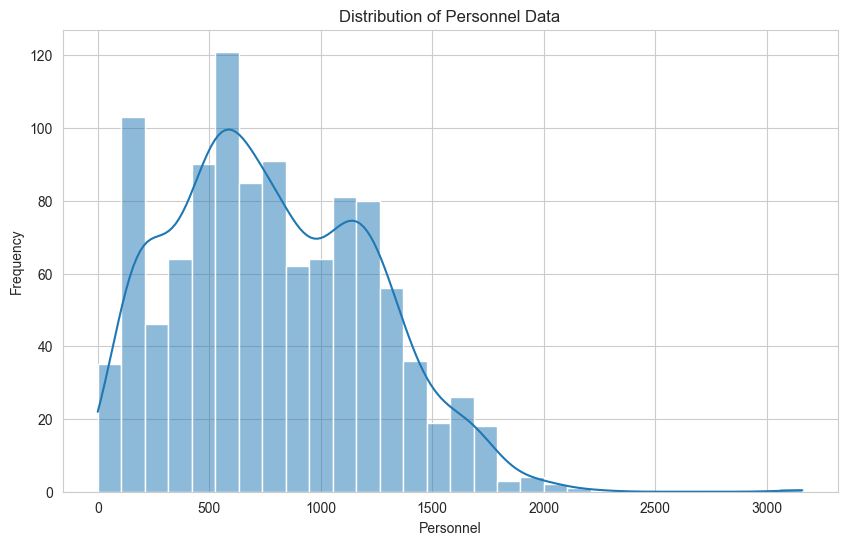

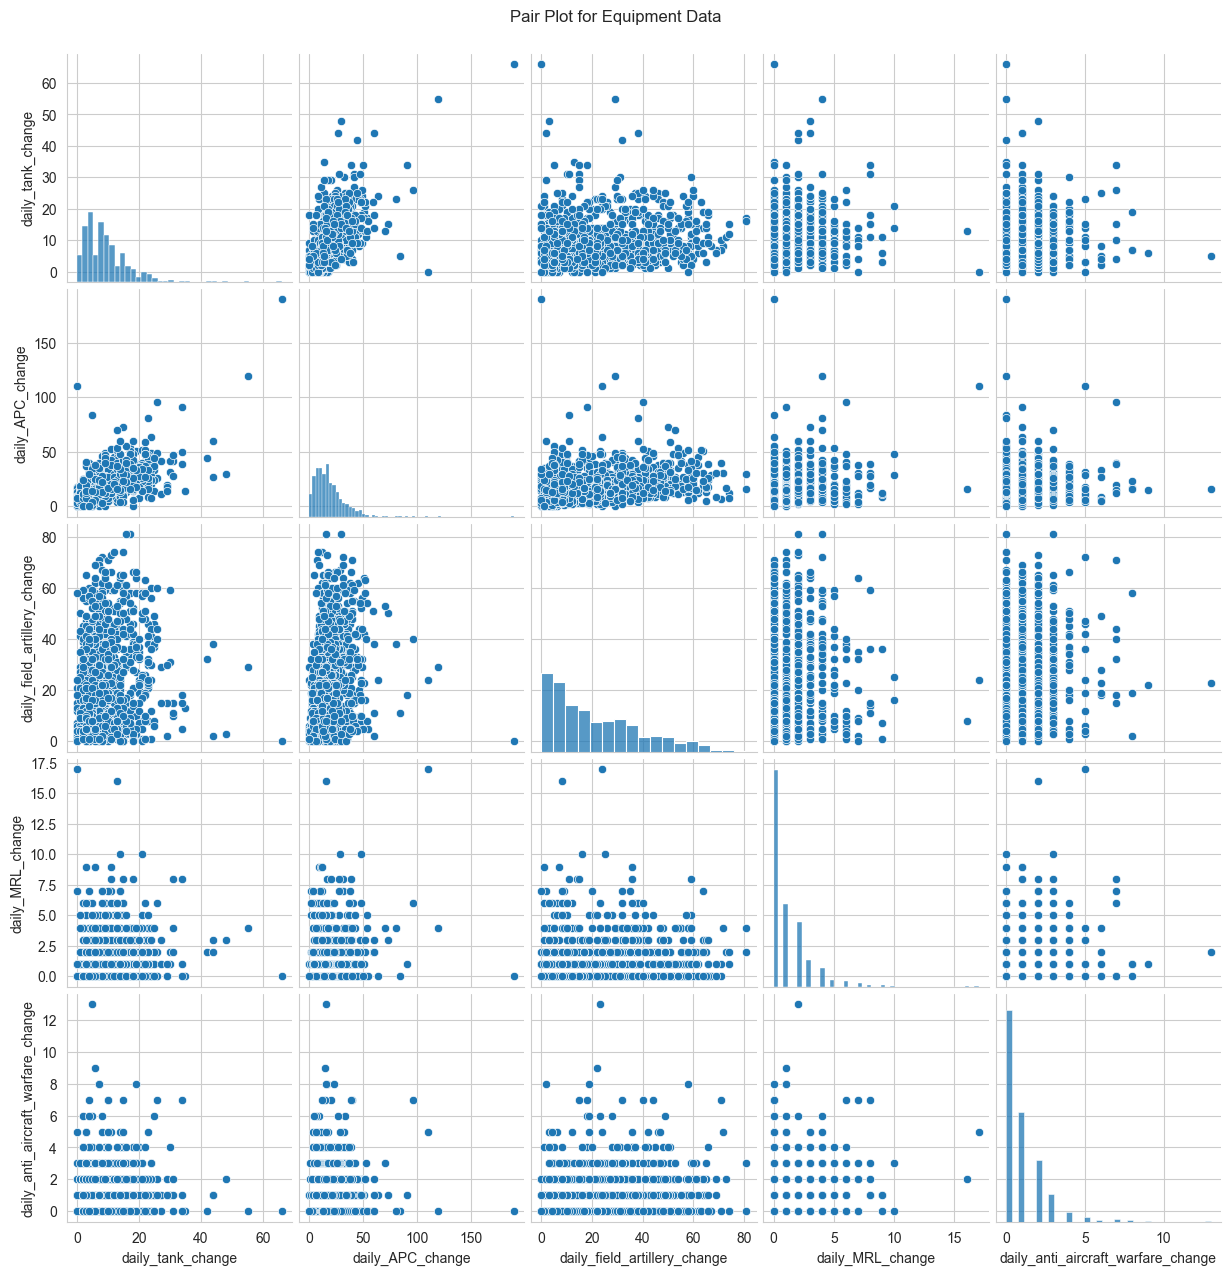

In [363]:
# Distribution Plot for Personnel Data
plt.figure(figsize=(10, 6))
sns.histplot(personnel_data['daily_personnel_change'], bins=30, kde=True)
plt.title('Distribution of Personnel Data')
plt.xlabel('Personnel')
plt.ylabel('Frequency')
plt.show()

# Pair Plot for Equipment Data
sns.pairplot(equipment_data[['daily_tank_change', 'daily_APC_change', 'daily_field_artillery_change', 'daily_MRL_change', 'daily_anti_aircraft_warfare_change']])
plt.suptitle('Pair Plot for Equipment Data', y=1.02)
plt.show()

# () scatter plot for personnel data

In [364]:


# Create a new figure
fig = go.Figure()

# Add a scatter plot for personnel data
fig.add_trace(go.Scatter(x=personnel_data['date'], y=personnel_data['daily_personnel_change'],
                         mode='lines+markers',
                         name='Personnel'))

# Check if 'tank' column exists in equipment_data before plotting
if 'tank' in equipment_data.columns:
    # Add a scatter plot for tank data
    fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['tank'],
                             mode='lines+markers',
                             name='Tanks'))

# Update layout
fig.update_layout(title='Personnel and Tank Data Over Time',
                  xaxis_title='Date',
                  yaxis_title='Count',
                  legend_title='Legend')

# Show the plot
fig.show()

# Rename duplicate columns in equipment_data

# Scatter plot for daily personnel losses

In [365]:
import plotly.express as px

# Scatter plot for daily personnel losses
fig_daily_losses = px.scatter(personnel_data, x='date', y='daily_personnel_change', title='Daily Personnel Losses Over Time')
fig_daily_losses.show()

# Group the data by month and sum the daily personnel changes

In [366]:
import plotly.express as px

# Ensure the 'date' column is in datetime format
personnel_data['date'] = pd.to_datetime(personnel_data['date'])

# Group the data by month and sum the daily personnel changes
personnel_data['month'] = personnel_data['date'].dt.to_period('M')
monthly_personnel_losses = personnel_data.groupby('month')['daily_personnel_change'].sum().reset_index()

# Convert 'month' to string to avoid JSON serialization error
monthly_personnel_losses['month'] = monthly_personnel_losses['month'].astype(str)

# Create the bar chart
fig_monthly_losses = px.bar(monthly_personnel_losses, x='month', y='daily_personnel_change', title='Monthly Personnel Losses')
fig_monthly_losses.show()

# () List all columns

In [367]:
# List all columns in personnel_data
print("Columns in personnel_data:")
print(personnel_data.columns.tolist())

# List all columns in equipment_data
print("\nColumns in equipment_data:")
print(equipment_data.columns.tolist())

Columns in personnel_data:
['date', 'day', 'daily_personnel_change', 'daily_POW_change', 'month']

Columns in equipment_data:
['date', 'day', 'field artillery', 'drone_1', 'greatest losses direction', 'daily_aircraft_change', 'daily_helicopter_change', 'daily_tank_change', 'daily_APC_change', 'daily_field_artillery_change', 'daily_MRL_change', 'daily_naval_ship_change', 'daily_anti-aircraft_warfare_change', 'daily_special_equipment_change', 'daily_vehicles_and_fuel_tanks_change', 'daily_cruise_missiles_change', 'daily_anti_aircraft_warfare_change']


# () Rename columns

In [368]:
# Rename columns in personnel_data
personnel_data.rename(columns=lambda x: x.replace('daily_', '').replace('_change', ''), inplace=True)

# Rename columns in equipment_data
equipment_data.rename(columns=lambda x: x.replace('daily_', '').replace('_change', ''), inplace=True)

# Display the updated DataFrames to verify the changes
print("Updated Personnel Data Columns:")
print(personnel_data.columns.tolist())

print("\nUpdated Equipment Data Columns:")
print(equipment_data.columns.tolist())

Updated Personnel Data Columns:
['date', 'day', 'personnel', 'POW', 'month']

Updated Equipment Data Columns:
['date', 'day', 'field artillery', 'drone_1', 'greatest losses direction', 'aircraft', 'helicopter', 'tank', 'APC', 'field_artillery', 'MRL', 'naval_ship', 'anti-aircraft_warfare', 'special_equipment', 'vehicles_and_fuel_tanks', 'cruise_missiles', 'anti_aircraft_warfare']


# () Print the head

In [369]:
# Print the head of personnel_data DataFrame
print("Personnel Data Head:")
print(personnel_data.head())

# Print the head of equipment_data DataFrame
print("\nEquipment Data Head:")
print(equipment_data.head())

# Print the head of equipment_daily_changes DataFrame
print("\nEquipment Daily Changes Head:")
print(equipment_data.head())

# Print the head of equipment_correction_data DataFrame
print("\nEquipment Correction Data Head:")
print(equipment_correction_data.head())

Personnel Data Head:
        date   day  personnel  POW    month
0 2025-02-16  1089          0    0  2025-02
1 2025-02-15  1088       1730    0  2025-02
2 2025-02-14  1087       1180    0  2025-02
3 2025-02-13  1086       1200    0  2025-02
4 2025-02-12  1085       1250    0  2025-02

Equipment Data Head:
        date   day  field artillery  drone_1 greatest losses direction  \
0 2025-02-16  1089            23185    25377                       NaN   
1 2025-02-15  1088            23174    25341                       NaN   
2 2025-02-14  1087            23115    25224                       NaN   
3 2025-02-13  1086            23034    25072                       NaN   
4 2025-02-12  1085            22976    24919                       NaN   

   aircraft  helicopter  tank  APC  field_artillery  MRL  naval_ship  \
0         0           0     0    0                0    0           0   
1         0           0     5   84               11    0           0   
2         0           0    11   

Aircraft and Drone

In [370]:
fig = go.Figure()

# Add trace for aircraft

# Add trace for helicopters
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['helicopter'],
                    mode='lines+markers',
                    name='Helicopters'))

# Add trace for drones
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['drone_1'],
                    mode='lines+markers',
                    name='Drones'))

fig.show()

In [371]:
fig = go.Figure()

# Add trace for Tanks
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['tank'],
                    mode='lines+markers',
                    name='Tanks'))

# Add trace for APCs (Armored Personnel Carriers)
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['APC'],
                    mode='lines+markers',
                    name='APCs (Armored Personnel Carriers)'))

# Add trace for Field Artillery
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['field artillery'],
                    mode='lines+markers',
                    name='Field Artillery'))

# Add trace for MRL (Multiple Rocket Launchers)
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['MRL'],
                    mode='lines+markers',
                    name='MRL (Multiple Rocket Launchers)'))

# Add trace for Anti-Aircraft Warfare Systems
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['anti-aircraft_warfare'],
                    mode='lines+markers',
                    name='Anti-Aircraft Warfare Systems'))

# Add trace for Special Equipment (if detailed)
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['special_equipment'],
                    mode='lines+markers',
                    name='Special Equipment'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Equipment Losses Over Time",
                  xaxis_title="Date",
                  yaxis_title="Count",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show()

In [372]:
fig = go.Figure()


# Add trace for Vehicles and Fuel Tanks
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['vehicles_and_fuel_tanks'],
                    mode='lines+markers',
                    name='Vehicles and Fuel Tanks'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Military Vehicles and Fuel Tanks Over Time",
                  xaxis_title="Date",
                  yaxis_title="Count",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show()

In [373]:
fig = go.Figure()

# Add trace for naval ship
fig.add_trace(go.Scatter(x=equipment_data['date'], y=equipment_data['naval_ship'],
                    mode='lines+markers',
                    name='Naval Ship'))

fig.show()

In [374]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=personnel_data['date'], y=personnel_data['POW'],
                    mode='lines+markers',
                    name='POW'))

fig.show()

In [375]:
import plotly.graph_objects as go

# Define the x-axis data
x = equipment_data['date']  # Assuming 'date' is the column name for the x-axis data

fig = go.Figure()

# Add traces for each specified column
fig.add_trace(go.Scatter(x=x, y=equipment_data['aircraft'],
                    mode='lines+markers',
                    name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['helicopter'],
                    mode='lines+markers',
                    name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['tank'],
                    mode='lines+markers',
                    name='Tank'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['APC'],
                    mode='lines+markers',
                    name='APC'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['field_artillery'],
                    mode='lines+markers',
                    name='Field Artillery'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['MRL'],
                    mode='lines+markers',
                    name='MRL'))

fig.add_trace(go.Scatter(x=x, y=equipment_data['naval_ship'],
                    mode='lines+markers',
                    name='Naval Ship'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['anti_aircraft_warfare'],
                    mode='lines+markers',
                    name='Anti-Aircraft Warfare'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['special_equipment'],
                    mode='lines+markers',
                    name='Special Equipment'))

fig.add_trace(go.Scatter(x=x, y=equipment_data['vehicles_and_fuel_tanks'],
                    mode='lines+markers',
                    name='Vehicles and Fuel Tanks'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['cruise_missiles'],
                    mode='lines+markers',
                    name='Cruise Missiles'))


fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Equipment Losses Over Time",
                  xaxis_title="Date",
                  yaxis_title="Count",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show()


In [376]:
import plotly.graph_objects as go

# Define the x-axis data
x = equipment_data['date']  # Assuming 'date' is the column name for the x-axis data

fig = go.Figure()

# Add traces for each specified column
fig.add_trace(go.Scatter(x=x, y=equipment_data['aircraft'],
                    mode='lines+markers',
                    name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['helicopter'],
                    mode='lines+markers',
                    name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['tank'],
                    mode='lines+markers',
                    name='Tank'))

fig.add_trace(go.Scatter(x=x, y=equipment_data['field_artillery'],
                    mode='lines+markers',
                    name='Field Artillery'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['MRL'],
                    mode='lines+markers',
                    name='MRL'))

fig.add_trace(go.Scatter(x=x, y=equipment_data['naval_ship'],
                    mode='lines+markers',
                    name='Naval Ship'))
fig.add_trace(go.Scatter(x=x, y=equipment_data['anti_aircraft_warfare'],
                    mode='lines+markers',
                    name='Anti-Aircraft Warfare'))




fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Equipment Losses Over Time",
                  xaxis_title="Date",
                  yaxis_title="Count",
                  margin=dict(l=0, r=0, t=30, b=0))

fig.show()
